<a href="https://colab.research.google.com/github/DishaArsude/Tamizan-Skills-Internship-ML-AI-PROJECT-1/blob/main/Project_1_Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Upload your dataset or use a public one
df = pd.read_csv('emails.csv')  # Replace with your filename
df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)


In [ ]:
df['label_num'] = df['spam'].map({0: 0, 1: 1})

In [ ]:
X = df['clean_text']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.8883
Precision: 1.0000
Recall: 0.5586

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       856
           1       1.00      0.56      0.72       290

    accuracy                           0.89      1146
   macro avg       0.93      0.78      0.82      1146
weighted avg       0.90      0.89      0.88      1146



In [ ]:
def predict_spam(text):
    processed = preprocess(text)
    vec = vectorizer.transform([processed])
    pred = model.predict(vec)[0]
    return 'Spam' if pred == 1 else 'Ham'

# Example
print(predict_spam("Congratulations! You've won a free ticket. Click here!"))


Ham


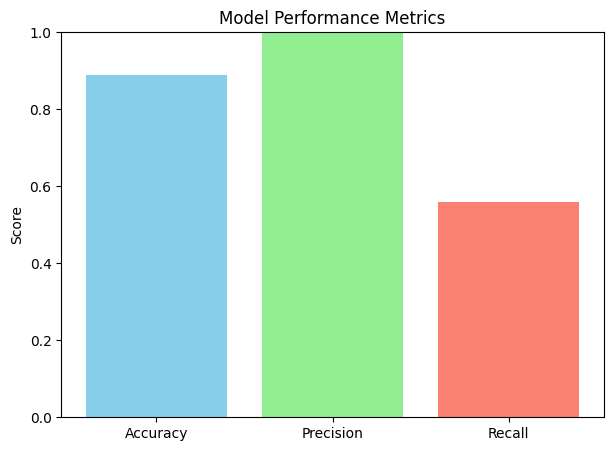

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

# Create the bar chart
plt.figure(figsize=(7, 5))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for better comparison
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()